In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn import datasets
from scipy.cluster.hierarchy import linkage, cut_tree
import matplotlib
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
x = iris.data
x = StandardScaler().fit_transform(x)
y = iris.target

# KMEDIAS

In [3]:
max_clusters = 15
min_clusters = 3
k = []
for i in range(min_clusters, max_clusters+1):
    k.append(str(i))
tabla = pd.DataFrame(columns=k, data=np.zeros((1, max_clusters-min_clusters+1), dtype=float))
tabla.columns.name = "Clusters"
tabla.index.name = "CV"

for c in k:
    kmedias = KMeans(n_clusters=int(c), random_state=0)
    kmedias.fit(x)
    moda = -1 * np.ones(int(c), dtype='int')        
    for i in range(int(c)):
           moda[i] = mode(y[kmedias.labels_ == i])[0].astype(int)
    y_test_predict = moda[kmedias.predict(x)]
    tabla.loc[0,c] = accuracy_score(y, y_test_predict)
    
tabla

Clusters         3         4         5         6         7     8         9  \
CV                                                                           
0         0.833333  0.846667  0.846667  0.826667  0.826667  0.82  0.913333   

Clusters        10        11        12        13        14        15  
CV                                                                    
0         0.953333  0.933333  0.973333  0.953333  0.946667  0.933333

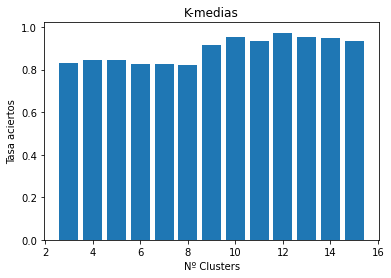

El valor de K más óptimo es: 12 que da una tasa de acierto de: 0.9733333333333334


In [4]:
plt.bar(np.arange(min_clusters,max_clusters+1, dtype='int'), tabla.mean(axis=0))
plt.title("K-medias")
plt.xlabel("Nº Clusters")
plt.ylabel("Tasa aciertos")
plt.show()
print("El valor de K más óptimo es:", tabla.columns[tabla.mean(axis=0).argmax()], "que da una tasa de acierto de:", tabla.mean(axis=0).max())

# Aglomerativo MIN

In [5]:
agl_min = linkage(x, method="single")
max_clusters = 15
min_clusters = 3
k = []
for i in range(min_clusters, max_clusters+1):
    k.append(str(i))
tabla = pd.DataFrame(columns=k, data=np.zeros((1, max_clusters-min_clusters+1), dtype=float))
tabla.columns.name = "Clusters"
tabla.index.name = "CV"

for c in k:
    clusters = cut_tree(agl_min, n_clusters=int(c)).reshape(-1)
    moda = -1 * np.ones(int(c), dtype='int')        
    for i in range(int(c)):
           moda[i] = mode(y[clusters == i])[0].astype(int)
    y_test_predict = moda[clusters]
    tabla.loc[0,c] = accuracy_score(y, y_test_predict)
    
tabla

Clusters         3         4         5         6         7         8    9  \
CV                                                                          
0         0.666667  0.686667  0.686667  0.693333  0.693333  0.693333  0.7   

Clusters   10        11        12        13        14        15  
CV                                                               
0         0.7  0.706667  0.706667  0.706667  0.713333  0.713333

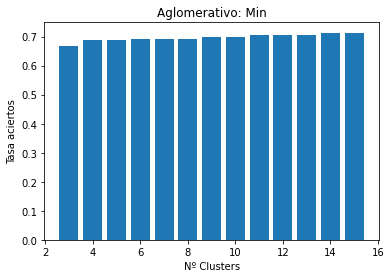

El valor de K más óptimo es: 14 que da una tasa de acierto de: 0.7133333333333334


In [6]:
plt.bar(np.arange(min_clusters,max_clusters+1, dtype='int'), tabla.mean(axis=0))
plt.title("Aglomerativo: Min")
plt.xlabel("Nº Clusters")
plt.ylabel("Tasa aciertos")
plt.show()
print("El valor de K más óptimo es:", tabla.columns[tabla.mean(axis=0).argmax()], "que da una tasa de acierto de:", tabla.mean(axis=0).max())

# Aglomerativo MAX

In [7]:
agl_max = linkage(x, method="complete")
max_clusters = 15
min_clusters = 3
k = []
for i in range(min_clusters, max_clusters+1):
    k.append(str(i))
tabla = pd.DataFrame(columns=k, data=np.zeros((1, max_clusters-min_clusters+1), dtype=float))
tabla.columns.name = "Clusters"
tabla.index.name = "CV"

for c in k:
    clusters = cut_tree(agl_max, n_clusters=int(c)).reshape(-1)
    moda = -1 * np.ones(int(c), dtype='int')        
    for i in range(int(c)):
           moda[i] = mode(y[clusters == i])[0].astype(int)
    y_test_predict = moda[clusters]
    tabla.loc[0,c] = accuracy_score(y, y_test_predict)
    
tabla

Clusters         3         4         5         6         7     8     9    10  \
CV                                                                             
0         0.786667  0.786667  0.786667  0.786667  0.786667  0.88  0.94  0.94   

Clusters    11    12        13        14        15  
CV                                                  
0         0.94  0.94  0.946667  0.946667  0.946667

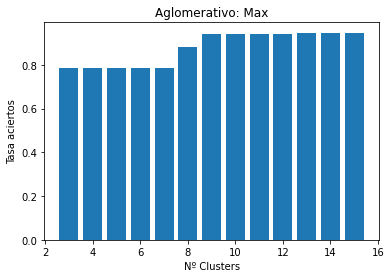

El valor de K más óptimo es: 13 que da una tasa de acierto de: 0.9466666666666667


In [8]:
plt.bar(np.arange(min_clusters,max_clusters+1, dtype='int'), tabla.mean(axis=0))
plt.title("Aglomerativo: Max")
plt.xlabel("Nº Clusters")
plt.ylabel("Tasa aciertos")
plt.show()
print("El valor de K más óptimo es:", tabla.columns[tabla.mean(axis=0).argmax()], "que da una tasa de acierto de:", tabla.mean(axis=0).max())

# Aglomerativo MEDIA

In [9]:
agl_med = linkage(x, method="average")
max_clusters = 15
min_clusters = 3
k = []
for i in range(min_clusters, max_clusters+1):
    k.append(str(i))
tabla = pd.DataFrame(columns=k, data=np.zeros((1, max_clusters-min_clusters+1), dtype=float))
tabla.columns.name = "Clusters"
tabla.index.name = "CV"

for c in k:
    clusters = cut_tree(agl_med, n_clusters=int(c)).reshape(-1)
    moda = -1 * np.ones(int(c), dtype='int')        
    for i in range(int(c)):
           moda[i] = mode(y[clusters == i])[0].astype(int)
    y_test_predict = moda[clusters]
    tabla.loc[0,c] = accuracy_score(y, y_test_predict)
    
tabla

Clusters         3         4     5     6     7     8     9    10    11    12  \
CV                                                                             
0         0.686667  0.686667  0.78  0.78  0.88  0.88  0.88  0.88  0.94  0.94   

Clusters    13    14    15  
CV                          
0         0.94  0.94  0.94

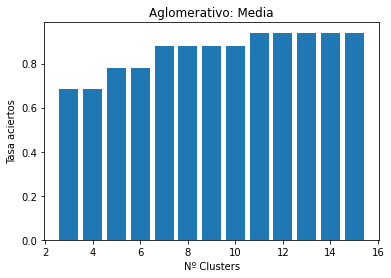

El valor de K más óptimo es: 11 que da una tasa de acierto de: 0.94


In [10]:
plt.bar(np.arange(min_clusters,max_clusters+1, dtype='int'), tabla.mean(axis=0))
plt.title("Aglomerativo: Media")
plt.xlabel("Nº Clusters")
plt.ylabel("Tasa aciertos")
plt.show()
print("El valor de K más óptimo es:", tabla.columns[tabla.mean(axis=0).argmax()], "que da una tasa de acierto de:", tabla.mean(axis=0).max())

# Aglomerativo WARD

In [11]:
agl_med = linkage(x, method="ward")
max_clusters = 15
min_clusters = 3
k = []
for i in range(min_clusters, max_clusters+1):
    k.append(str(i))
tabla = pd.DataFrame(columns=k, data=np.zeros((1, max_clusters-min_clusters+1), dtype=float))
tabla.columns.name = "Clusters"
tabla.index.name = "CV"

for c in k:
    clusters = cut_tree(agl_med, n_clusters=int(c)).reshape(-1)
    moda = -1 * np.ones(int(c), dtype='int')        
    for i in range(int(c)):
           moda[i] = mode(y[clusters == i])[0].astype(int)
    y_test_predict = moda[clusters]
    tabla.loc[0,c] = accuracy_score(y, y_test_predict)
    
tabla

Clusters         3         4         5         6         7         8  \
CV                                                                     
0         0.826667  0.833333  0.833333  0.833333  0.833333  0.833333   

Clusters         9        10        11        12        13        14        15  
CV                                                                              
0         0.833333  0.893333  0.893333  0.926667  0.926667  0.933333  0.933333

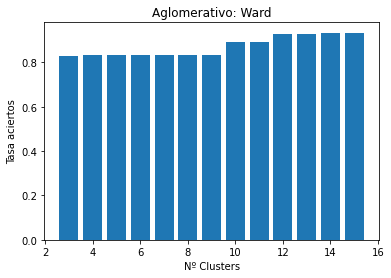

El valor de K más óptimo es: 14 que da una tasa de acierto de: 0.9333333333333333


In [12]:
plt.bar(np.arange(min_clusters,max_clusters+1, dtype='int'), tabla.mean(axis=0))
plt.title("Aglomerativo: Ward")
plt.xlabel("Nº Clusters")
plt.ylabel("Tasa aciertos")
plt.show()
print("El valor de K más óptimo es:", tabla.columns[tabla.mean(axis=0).argmax()], "que da una tasa de acierto de:", tabla.mean(axis=0).max())